<a href="https://colab.research.google.com/github/nusc2016/DS-Unit-4-Sprint-1-NLP/blob/main/Module2/Aaron_Huizenga_LS_DS_412_Vector_Representations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

In [2]:
job_listing = ('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv')
jobs = pd.read_csv(job_listing)
text = jobs['description']

In [3]:
# This is an example of how you would extract an individual text from the 
# description column.

soup = BeautifulSoup(text[0])
example = soup.get_text(" ")
example

'b" Job Requirements: \\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them \\n Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) \\n Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R \\n Ability to communicate Model findings to both Technical and Non-Technical stake holders \\n Hands on experience in SQL/Hive or similar programming language \\n Must show past work via GitHub, Kaggle or any other published article \\n Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field. \\nApply Now "'

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [4]:
from bs4 import BeautifulSoup
import requests

"""
How to extract individual text from description column
soup = BeautifulSoup(text[0])
print(soup.prettify())
soup.get_text()
"""

job_description = []

for doc in text:
    soup = BeautifulSoup(doc)
    soup_text = soup.get_text(" ")
    text = soup_text.replace("\\n", '')
    text2 = text.replace("/", " ")
    text3 = text2.replace('\\xe2\\x80\\x99', "'")
    text4 = text3.replace('\xe2\x80\x99', "'")
    text5 = text4.replace(' \xe2\x80\xa6', '')
    text6 = text5.replace('b"', '')
    text7 = text6.replace(' \xe2\x80\x93', '')
    text8 = text7.replace('nfosys\xe2\x80\x93', '')
    text9 = text8.replace("b'", '')
    job_description.append(text9)

print(*job_description[:3], sep= "\n\n")

jobs['text'] = job_description

jobs.head()

 Job Requirements: Conceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear  Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them  Intermediate to expert level coding skills in Python R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)  Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R  Ability to communicate Model findings to both Technical and Non-Technical stake holders  Hands on experience in SQL Hive or similar programming language  Must show past work via GitHub, Kaggle or any other published article  Master's degree in Statistics Mathematics Computer Science or any other quant specific field. Apply Now "

 Job Description   As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their hea

,Unnamed: 0,description,title,text
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description As a Data Scientist 1, you ..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on co...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a month Contract Under the ge..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations...


In [5]:
jobs.columns

Index(['Unnamed: 0', 'description', 'title', 'text'], dtype='object')

In [7]:
# I want to drop "unnamed" and "description" columns.

jobs = jobs.drop(columns=["Unnamed: 0", 'description'])
jobs.head()

,title,text
0,Data scientist,Job Requirements: Conceptual understanding in...
1,Data Scientist I,"Job Description As a Data Scientist 1, you ..."
2,Data Scientist - Entry Level,As a Data Scientist you will be working on co...
3,Data Scientist,"$4,969 - $6,756 a month Contract Under the ge..."
4,Data Scientist,Location: USA \xe2\x80\x93 multiple locations...


In [9]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 8.5MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=97e4113e81b94bda8d8b2a84f3de7c49ad9941ce05cec7421983df0d48181039
  Stored in directory: /tmp/pip-ephem-wheel-cache-xxqcpml_/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [17]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [20]:
# defining stop words
import spacy
nlp = spacy.load('en_core_web_sm')

In [21]:
stop_words = nlp.Defaults.stop_words.union(['\\n', 'b', 
                                            'etc', ' ', 'job',
                                           'requirement', 
                                            'requirements', 
                                            'for\\xe2\\x80\\xa6',
                                           'life\\xe2\\x80\\xa6',
                                           "we\\'re", "aren\\'t",
                                           '', 'b"'])

## 2) Use Spacy to tokenize the listings 

In [22]:
##### Your Code Here #####

stop_words

{'',
 ' ',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '\\n',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 "aren\\'t",
 'around',
 'as',
 'at',
 'b',
 'b"',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'for

In [23]:
sample = jobs['text'][1]

print([token.lemma_ for token in nlp(sample) if
       (token.is_punct == False) and
       (token.text.lower() not in stop_words)])

['Description', '  ', 'Data', 'Scientist', '1', 'help', 'build', 'machine', 'learning', 'model', 'data', 'pipeline', 'micro', 'service', 'help', 'client', 'navigate', 'healthcare', 'journey', 'empower', 'improve', 'generation', 'Accolade', 'Applications', 'user', 'experience', 'day', 'work', 'small', 'agile', 'team', 'design', 'develop', 'mobile', 'application', 'iterative', 'fashion', 'work', 'tight', 'knit', 'group', 'development', 'team', 'member', 'Seattle', 'contribute', 'good', 'practice', 'help', 'guide', 'future', 'application', 'operate', 'effectively', 'collaborative', 'member', 'development', 'team', 'operate', 'effectively', 'individual', 'quick', 'turnaround', 'enhancement', 'fix', 'responsible', 'meeting', 'expectation', 'deliverable', 'time', 'high', 'quality', 'drive', 'implement', 'new', 'feature', 'mobile', 'application', 'perform', 'thorough', 'manual', 'testing', 'writing', 'test', 'case', 'cover', 'area', 'identify', 'new', 'development', 'tool', 'approach', 'incre

In [24]:
job_token = []

for doc in jobs['text']:
    text = [token.lemma_ for token in nlp(doc) if
            (token.is_punct == False) and
            (token.text.lower() not in stop_words)]
    job_token.append(text)

jobs['token'] = job_token

In [25]:
jobs.head(20)

,title,text,token
0,Data scientist,Job Requirements: Conceptual understanding in...,"[conceptual, understanding, Machine, Learning,..."
1,Data Scientist I,"Job Description As a Data Scientist 1, you ...","[Description, , Data, Scientist, 1, help, bu..."
2,Data Scientist - Entry Level,As a Data Scientist you will be working on co...,"[Data, Scientist, work, consult, business, res..."
3,Data Scientist,"$4,969 - $6,756 a month Contract Under the ge...","[$, 4,969, $, 6,756, month, contract, general,..."
4,Data Scientist,Location: USA \xe2\x80\x93 multiple locations...,"[location, USA, \xe2\x80\x93, multiple, locati..."
5,Data Scientist,Create various Business Intelligence Analytic...,"[create, Business, Intelligence, Analytical, r..."
6,Associate Data Scientist – Premium Analytics,As Spotify Premium swells to over 96M subscri...,"[Spotify, Premium, swell, 96, M, subscriber, g..."
7,Data Scientist,"Everytown for Gun Safety, the nation's largest...","[Everytown, Gun, Safety, nation, large, gun, v..."
8,Sr. Data Scientist,MS in a quantitative discipline such as Stati...,"[MS, quantitative, discipline, Statistics, Mat..."
9,"Data Scientist, Lifecyle",Slack is hiring experienced data scientists t...,"[Slack, hire, experienced, datum, scientist, j..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [26]:
##### Your Code Here #####

from sklearn.feature_extraction.text import CountVectorizer

sample = jobs['text']

# This is the transformer function
vect = CountVectorizer()

# This will build the vocab
vect.fit(sample)

# This will transform the text
dtm = vect.transform(sample)
print(dtm.shape)

(426, 8525)


In [28]:
# Upon further investigation, this function revealed way too many numbers. 
# I will comment it out, but feel free to look for yourself.

# print(vect.get_feature_names())

## 4) Visualize the most common word counts

In [30]:
##### Your Code Here #####

word_count = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

word_count

,00,000,02115,03,0305,0356,04,057,062,06366,08,10,100,1000,1001,1008,100k,100x,1026036,105,1079302,1082692,10b,10ms,10x,11,110k,112,114157802,12,120,125,126,130,1315,1324b,138,14,140,15,...,xb7,xb7experience,xb7identify,xb7knowledge,xbb,xbf,xbox,xc2,xc3,xe2,xef,xgboost,xp,xpo,yards,year,years,yes,yet,yeti,yield,york,you,young,your,yours,yourself,youtube,yrs,zenreach,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
423,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


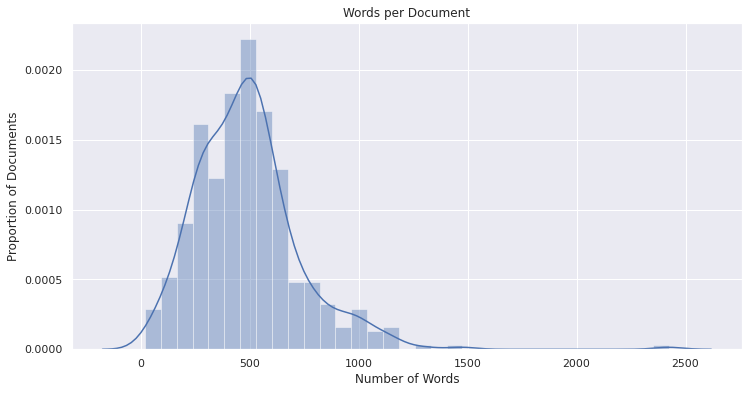

In [45]:
import seaborn as sns
sns.set()

num_words = [len(s.split()) for s in jobs['text']]

plt.figure(figsize=(12, 6))
sns.distplot(num_words)
plt.title('Words per Document')
plt.xlabel('Number of Words')
plt.ylabel('Proportion of Documents')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [35]:
##### Your Code Here #####

# I will start by importing the necessary functions for this section of code.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english',
                        ngram_range = (1, 2),
                        min_df = 3,
                        max_df = 0.5)

# The following should create the vocab and tf-idf score per document.
dtm = tfidf.fit_transform(jobs['text'])

# The following will get feature names to use as a df column headers.
dtm = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())
print(dtm.shape)
dtm.head()

(426, 12283)


,000,000 employees,000 year,04,10,10 time,10 years,100,100 000,100 companies,100 countries,100 premium,1079302,1079302 kbrwyle,11,11 04,12,12 months,14,15,150,17,18,19,19 2019,20,20 pounds,200,200 000,2012,2012 obama,2013,2013 members,2015,2015 based,2017,2018,2019,2019 building,2019 months,...,xae,xbb,xbb deploy,xbb excellent,xbb experience,xbb familiarity,xbb strong,xbb utilize,xc2,xc2 xae,xc2 xbb,xc3,xe2,xe2 x80,xe2 x84,xef,xef x83,xgboost,year,year experience,year simple,years analytical,years applied,years come,years data,years experience,years hands,years industry,years professional,years related,years relevant,years requirements,years technical,years work,years working,yes,york,york city,york offices,yrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112605,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.046330,0.046916,0.0,0.0,0.0,0.0,0.033834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.051939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.106617,0.107967,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [37]:
##### Your Code Here #####
# Again I will import the necessary functions/libraries for this section of code.
from sklearn.neighbors import NearestNeighbors

# The following will fit onto DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [38]:
nn.kneighbors([dtm.iloc[1].values])

(array([[0.        , 1.30733375, 1.31680955, 1.31970044, 1.32237993]]),
 array([[  1,  59, 222, 417, 201]]))

In [39]:
jobs['text'][1][:150]

' Job Description   As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navig'

In [41]:
indeed_job_post = ["""
Immediate openings available now. Start as soon as 7 days. No resume or previous work experience required.
Amazon remains open as an essential business to serve our communities delivering critical supplies directly to the doorsteps of people who need them. Find out what Amazon is doing to provide a safe environment for employees at this time on our COVID-19 FAQ page.
Join Amazon and become part of the dedicated team that gets orders ready for customers. Stay active during your work day in this fast-paced warehouse environment. You’ll be on the move for your whole shift.
This is a full-time role, which at Amazon means you’ll get to take advantage of your 3-day weekend by working a full-time 4-day week.
Here are some of the things you’ll get to do with us:
Receive and put away inventory
Get customer orders ready and pack them up
Load boxes into trucks for shipment
Work around moving machines like order pickers, forklifts, mobile carts, and
possibly robots! Use scanners to scan bar codes on products Check out what some
of our employees have to say about their warehouse jobs:
https://www.amazondelivers.jobs/about/warehouse-jobs
Candidates must be 18 years or older with ability to read and speak English for safety.

Reasons you’ll love working here:
Health and safety are a top priority with all of our roles and sites. We continue
to consult with medical and health experts, and take all recommended precautions
in our buildings and stores to keep people healthy. Career development: Many of 
our entry-level employees become leaders in operations, HR, and other areas. 
See where your Amazon journey can take you. Earn more: You can expect a 
competitive wage and reliable pay check when you work for Amazon. Benefits: Our 
range of benefits can include health care starting on day one, employee discounts,
401(k) savings plans, paid time off and more! Find out which benefits you'll get
after you choose your role with us. Reliable hours: We will give you a stable 
schedule you can count on. Learn more here: https://www.amazondelivers.jobs/about/benefits

Basic qualifications:
High school, GED, or equivalent diploma

Amazon is committed to a diverse and inclusive workplace. Amazon is an equal
opportunity employer and does not discriminate on the basis of race, national
origin, gender, gender identity, sexual orientation, protected veteran status,
disability, age, or other legally protected status. For individuals with
disabilities who would like to request an accommodation, please visit
https://www.amazon.jobs/en/disability/us.

Candidates must be 18 years or older and be able to stand/walk for extended
periods of time, frequently push, pull, squat, bend and reach, and lift up to
49 lbs, with or without reasonable accommodation. Candidates must also have a
high school diploma or equivalent.

Amazon is committed to a diverse and inclusive workplace. Amazon is an equal
opportunity employer and does not discriminate on the basis of race, national
origin, gender, gender identity, sexual orientation, protected veteran status,
disability, age, or other legally protected status. For individuals with
disabilities who would like to request an accommodation, please visit
https://www.amazon.jobs/en/disability/us.
"""]

In [42]:
# Query
q = tfidf.transform(indeed_job_post)
q

<1x12283 sparse matrix of type '<class 'numpy.float64'>'
	with 190 stored elements in Compressed Sparse Row format>

In [43]:
nn.kneighbors(q.todense())

(array([[1.28945871, 1.30023706, 1.31377193, 1.31658991, 1.31668521]]),
 array([[158,  14,  32, 396,   8]]))

In [44]:
jobs['text'][201]

" Internship Overview Data Science Internships Portland, OR or Seattle, WA These twelve-week internships are scheduled to begin in May June 2019  Responsibilities & Requirements Cambia Health Solutions is working to create a seamless and frictionless health care experience for consumers nationwide. This presents a unique challenge and opportunity for innovative and disruptive solutions from our Artificial Intelligence team.  Our Data Scientists design, develop, and implement data-driven solutions using machine learning technologies and advanced statistical analyses. You should be passionate about finding insights in data, comfortable with large and fragmented data sets, and command a variety of analytic tools at your disposal.  Internship opportunities are available on the following teams: Natural Language Processing, Deep Learning, Product Development and Clinical Analytics.  Natural Language Processing in Seattle, WA Our NLP team is looking for a passionate, talented and inventive NL

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 